In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np



In [3]:
#setting random seed
np.random.seed(0)

In [4]:
#Object holding iris data
iris = load_iris()

#Creating dataframe with feature variables
df = pd.DataFrame(iris.data, columns = iris.feature_names)

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#Adding target column
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
#Test and train data
df['train_data'] =np.random.uniform(0,1 ,len(df)) <= 0.75

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,train_data
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [9]:
#Making dataframes with test and train rows
train = df[df['train_data'] == True]
test = df[df['train_data'] == False]

print('Observations in training data:', len(train))
print('Observations in test data:', len(test))
                 

Observations in training data: 118
Observations in test data: 32


In [10]:
#Creating list of features
features = df.columns[:4]

features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [16]:
#Converting each species name to digits

y = pd.factorize(train['species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [17]:
#Creating random forest classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

#Training the classifier
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [18]:
#Applying trained clasifier to test
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [21]:
#predicted probabilities
clf.predict_proba(test[features])[0:10]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [24]:
#Mapping names for the predicted plants
predicted = iris.target_names[clf.predict(test[features])]


#Viewing predicted species
predicted[0:30]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica'], dtype='<U10')

In [25]:
#Actual species
test['species'].head()

7     setosa
8     setosa
10    setosa
13    setosa
17    setosa
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [27]:
# Create the cross-tabulation
cross_tab = pd.crosstab(test['species'], predicted, rownames=['Actual Species'], colnames=['Predicted Species'])

# Print the cross-tabulation
print(cross_tab)

Predicted Species  setosa  versicolor  virginica
Actual Species                                  
setosa                 13           0          0
versicolor              0           5          2
virginica               0           0         12


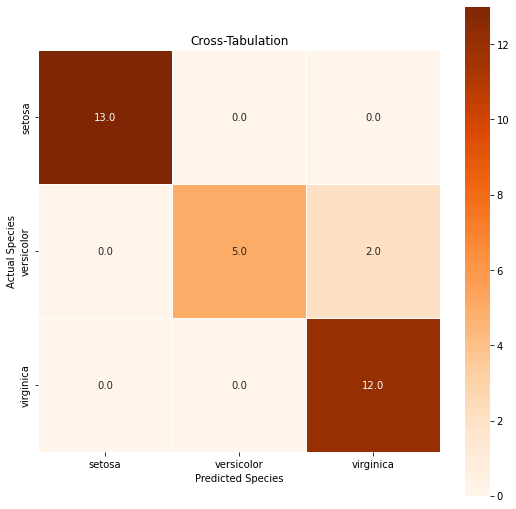

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'cross_tab' variable containing the cross-tabulation matrix

plt.figure(figsize=(9, 9))

sns.heatmap(cross_tab, annot=True, fmt=".1f", linewidths=.5, square=True, cmap="Oranges")
plt.ylabel('Actual Species')
plt.xlabel('Predicted Species')
plt.title('Cross-Tabulation')

plt.show()



In [35]:
sumOfPredictions = 32
sumOfInaccuratePredictions = 2
sumOfAccuratePredictions = sumOfPredictions - sumOfInaccuratePredictions
accuracy = (sumOfAccuratePredictions / sumOfPredictions) * 100
print("Accuracy:", accuracy,"%")



Accuracy: 93.75 %
